Assignment 6:

The goal of this project is to 
a) practice visualizing data and
b) learn about data correlation and smoothing.

Remember that for clear data visualization, a balance must be sought that maximize
the information provided without overwhelming the viewer, or in losing too much detail.

Libraries for should (could) be used:

pandas
numpy (optional)
matplotlib (and optionally seaborn)

Tasks:

1)Visualize the data within climate.csv file
    -generate graph(s) the CH4, CO2, N2O and SO2 concentrations versus the year
    -generate graph(s) the CH4, CO2, N2O and SO2 concentrations versus temperature anomalies

2)Data correlation
    -determine the correlation (via the Pearson method) between all CH4, CO2, N2O, SO2 concentrations and the temperature
    -anomaly categories (i.e. create a correlation matrix)
    -generate a heatmap plot of the resulting correlation matrix

3)Data smoothing
    -smooth (using a reasonble "window" size) the temperature anomaly data using a rolling mean (a.k.a. a moving average)
            Hint: can be done using either pandas or numpy (see convolve)
    -generate a graph of the resulting values (e.g. year vs. rolling mean of temperature anomalies)
    -save the new smoothed data and all of the original data (i.e. the data within climate.csv) to a new csv-formatted file
            (e.g. climate-rolling-mean.csv)
    
4)Save all graphs/plots to a png-formatted file(s) (I would prefer to have a single file.)

-------------------------------------------------------------------------------------------------------------------------

Data

1) CH4, CO2 and N2O

Global trends
A majority of the data comes from reference [1]
Newer and more accurate values come from reference [2] global trends

2) SO2 [3]

Data are for American trends only

3) Temperature [4]

Global trends
This data illustrates the change in global surface temperature relative to 1951-1980 average temperatures

In [1]:
# Remember // Check at the end

"""
_init_main... 
You can simply do axarr[1,0].set_facecolor('grey')


# Not needed for task 1 maybe delet ?

# safe concentrations for shorter plot txt

ch4_con = climate_df['CH4 (ppb)'].values 
co2_con = climate_df['CO2 (ppm)'].values
n2o_con = climate_df['N2O (ppb)'].values
so2_con = climate_df['SO2 (ppb)'].values
yeahrs = climate_df['Year (AD)'].values



"""

"\n_init_main... \nYou can simply do axarr[1,0].set_facecolor('grey')\n\n\n# Not needed for task 1 maybe delet ?\n\n# safe concentrations for shorter plot txt\n\nch4_con = climate_df['CH4 (ppb)'].values \nco2_con = climate_df['CO2 (ppm)'].values\nn2o_con = climate_df['N2O (ppb)'].values\nso2_con = climate_df['SO2 (ppb)'].values\nyeahrs = climate_df['Year (AD)'].values\n\n\n\n"

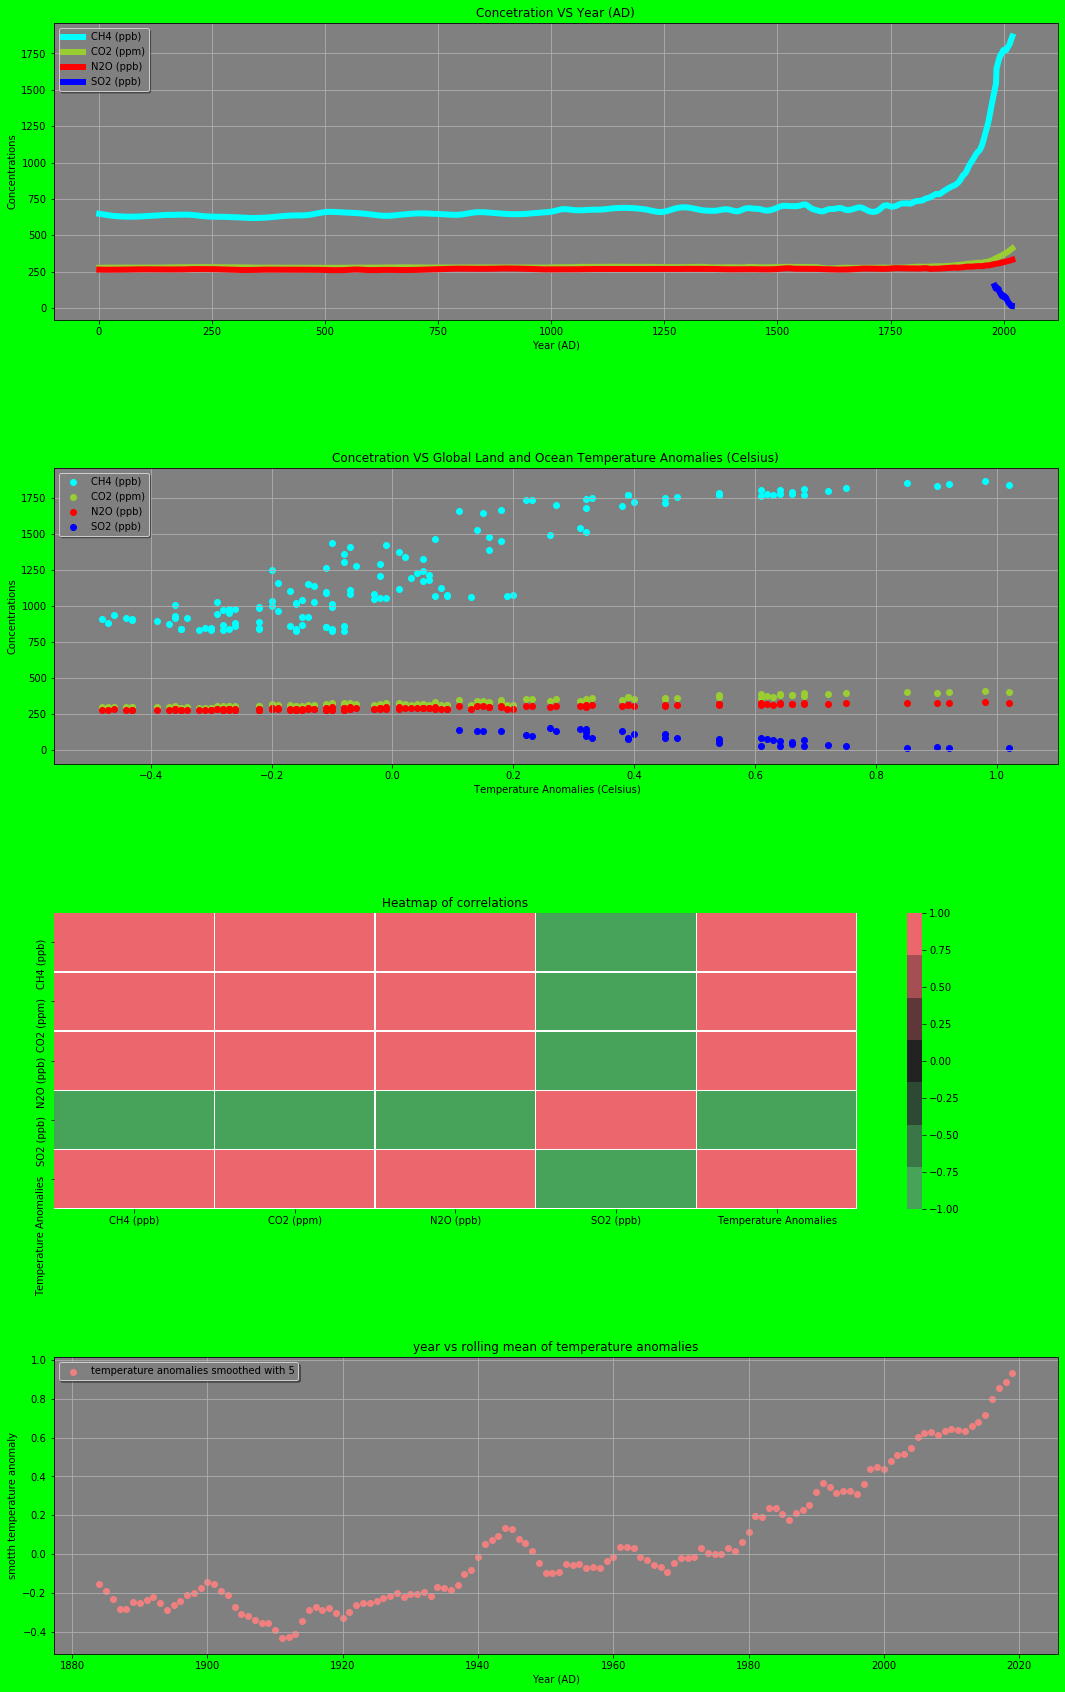

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import numpy as np

#general settings
plt.rcParams['axes.facecolor']='grey'
plt.rcParams['axes.grid']=True

climate_df = pd.read_csv('climate.csv')
climate_df

#1
def plt_concentrations_vs_year():
    colors = ['blue', 'red', 'yellowgreen', 'cyan']
    
    for i in climate_df[['CH4 (ppb)', 'CO2 (ppm)', 'N2O (ppb)', 'SO2 (ppb)']]: 
        farbe=colors.pop()
        plt.plot(climate_df['Year (AD)'], climate_df[i], color = farbe, label=i , linewidth=6)

    #Concentration vs year
    plt.xlabel(climate_df['Year (AD)'].name)
    plt.ylabel('Concentrations')
    plt.title('Concetration VS {}'.format(climate_df['Year (AD)'].name))
    plt.legend(loc='best', shadow=True, fontsize='medium')
    
    #ax1.set_xticks(np.arange(0,max(climate_df['Year (AD)'])+20,50))
    #ax1.set_xticks(np.linspace(0,2020,34))


def plt_concentrations_vs_anomalies():
    colors = ['blue', 'red', 'yellowgreen', 'cyan']
    
    for i in climate_df[['CH4 (ppb)', 'CO2 (ppm)', 'N2O (ppb)', 'SO2 (ppb)']]: 
        farbe=colors.pop()
        plt.scatter(climate_df['Global Land and Ocean Temperature Anomalies (Celsius)'], climate_df[i], color = farbe, label=i)
    
    #Concentration vs anomalies
    plt.xlabel(' Temperature Anomalies (Celsius)')
    plt.ylabel('Concentrations')
    plt.title('Concetration VS {}'.format(climate_df['Global Land and Ocean Temperature Anomalies (Celsius)'].name))
    plt.legend(loc='best', shadow=True, fontsize='medium')

#2
def plt_heatmap():
    df_withoutyear = climate_df.drop('Year (AD)', axis='columns')
    df_withoutyear = df_withoutyear.rename(columns={'Global Land and Ocean Temperature Anomalies (Celsius)': 'Temperature Anomalies'})
    correlation_matrix = df_withoutyear.corr( method='pearson')
    
    colorpalette = sns.diverging_palette(133, 10, l=60, n=7, center="dark")
    sns.set_palette(colorpalette)
    
    ax = sns.heatmap(correlation_matrix,vmin=-1, vmax=1, linewidths=.5,cmap=colorpalette)
    ax.set_title('Heatmap of correlations')

#3
def plt_and_save_smoothdata(smooth_lvl=None):
    rolling_mean=climate_df['Global Land and Ocean Temperature Anomalies (Celsius)'].rolling(smooth_lvl).mean()

    plt.scatter(climate_df['Year (AD)'],rolling_mean,label = 'temperature anomalies smoothed with {}'.format(smooth_lvl), c = 'lightcoral')
    plt.xlabel(climate_df['Year (AD)'].name)
    plt.ylabel('smotth temperature anomaly')
    plt.title('year vs rolling mean of temperature anomalies')
    plt.legend(loc='best', shadow=True, fontsize='medium')
    #Safe data
    df_climate_rolling_mean = climate_df
    df_climate_rolling_mean['Smoothed temperature anomalies']=rolling_mean
    df_climate_rolling_mean.to_csv('climate-rolling-mean.csv', sep=',', index=False, encoding='utf-8')
    
fig=plt.figure(figsize = (18,30), facecolor = 'lime')
plt.subplots_adjust(hspace=0.5)

plt.subplot(411)
plt_concentrations_vs_year()

plt.subplot(412)
plt_concentrations_vs_anomalies()

plt.subplot(413)
plt_heatmap()

plt.subplot(414)
plt_and_save_smoothdata(5)

plt.show


fig.savefig("test.png")



In [ ]:
'''    
  #  hmm = plt.figure(figsize = (18,15), facecolor = 'lime')

  #  hmm.subplots_adjust(hspace=0.2)
   # ax1=hmm.add_subplot(211)
    #ax2=hmm.add_subplot(212)
    
    colors = ['blue', 'red', 'yellowgreen', 'cyan']
    
    for i in climate_df[['CH4 (ppb)', 'CO2 (ppm)', 'N2O (ppb)', 'SO2 (ppb)']]: 
        farbe=colors.pop()
        ax1.plot(climate_df['Year (AD)'], climate_df[i], color = farbe, label=i , linewidth=6)
        ax2.scatter(climate_df['Global Land and Ocean Temperature Anomalies (Celsius)'], climate_df[i], color = farbe, label=i)

    #Concentration vs year
    ax1.set_xlabel(climate_df['Year (AD)'].name)
    ax1.set_ylabel('Concentrations')
    ax1.set_title('Concetration VS {}'.format(climate_df['Year (AD)'].name))
    ax1.legend(loc='best', shadow=True, fontsize='medium')
    #ax1.set_xticks(np.arange(0,max(climate_df['Year (AD)'])+20,50))
    #ax1.set_xticks(np.linspace(0,2020,34))
    
    #Concentration vs anomalies
    ax2.set_xlabel(' Temperature Anomalies (Celsius)')
    ax2.set_ylabel('Concentrations')
    ax2.set_title('Concetration VS {}'.format(climate_df['Global Land and Ocean Temperature Anomalies (Celsius)'].name))
    ax2.legend(loc='best', shadow=True, fontsize='medium')
#plt_concentrations_vs_something()'''